<a href="https://colab.research.google.com/github/Pedro-hn/Multiple-Linear-Regression/blob/main/c%C3%B3digo_flu%C3%AAncia_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Importando os dados

In [ ]:
#importando os dados
caminho = '/content/drive/MyDrive/Colab Notebooks/Dados/dados_avc_tcc.csv'
dados = pd.read_csv(caminho)

Visão geral sobre os dados

In [ ]:
dados.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
dados.shape

(4981, 11)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


Renomeando as variáveis

In [ ]:
dados = dados.rename(columns={'gender': 'sexo',
                              'age': 'idade'})

Recodificando as variáveis

In [ ]:
dados['sexo'] = dados['sexo'].replace({'Male': 'Masculino',
                                       'Female': 'Feminino'})

dados['hypertension'] = dados['hypertension'].replace({0: 'sem_hipertensao',
                                                       1: 'hipertensao'})

dados['heart_disease'] = dados['heart_disease'].replace({0: 'nao_cardiaco',
                                                         1: 'cardiaco'})

dados['ever_married'] = dados['ever_married'].replace({'Yes': 'casado',
                                                        'No': 'solteiro'})

dados['work_type'] = dados['work_type'].replace({'Private': 'Privado',
                                                 'Self-employed': 'Autônomo',
                                                 'children': 'Filhos',
                                                 'Govt_job': 'Pública'})
dados['smoking_status'] = dados['smoking_status'].replace({'never smoked': 'nunca_fumou',
                                                           'Unknown': 'fumo_desconhecido',
                                                           'formerly smoked': 'fuma_formalmente',
                                                           'smokes': 'fumante_ativo'})

 Convertendo variáveis classificadas incorretamente

In [ ]:
cols_para_converter = ['hypertension', 'heart_disease']
dados[cols_para_converter] = dados[cols_para_converter].apply(lambda x: x.astype('category'))
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sexo               4981 non-null   object  
 1   idade              4981 non-null   float64 
 2   hypertension       4981 non-null   category
 3   heart_disease      4981 non-null   category
 4   ever_married       4981 non-null   object  
 5   work_type          4981 non-null   object  
 6   Residence_type     4981 non-null   object  
 7   avg_glucose_level  4981 non-null   float64 
 8   bmi                4981 non-null   float64 
 9   smoking_status     4981 non-null   object  
 10  stroke             4981 non-null   int64   
dtypes: category(2), float64(3), int64(1), object(5)
memory usage: 360.3+ KB


Estatísticas univariadas

In [ ]:
dados.describe()

,idade,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,105.943562,28.498173,0.049789
std,22.662755,45.075373,6.790464,0.217531
min,0.080000,55.120000,14.000000,0.000000
25%,25.000000,77.230000,23.700000,0.000000
50%,45.000000,91.850000,28.100000,0.000000
75%,61.000000,113.860000,32.600000,0.000000
max,82.000000,271.740000,48.900000,1.000000


Tratamento de valores duplicados

In [ ]:
#verifica a quantidade de linhas duplicadas
dados.duplicated().sum()

np.int64(0)

In [ ]:
#remove as linhas duplicadas
dados.drop_duplicates(inplace=True)

Tratamento de valores faltantes

In [ ]:
#verifica a quantidade de valores faltantes em cada variável
print("\033[92m \n--------------Valores Absolutos--------------------\n", "\033[97m \n", dados.isna().sum())
print("\033[92m \n--------------Valores Percentuais--------------------\n", "\033[97m \n", dados.isna().sum()/dados.shape[0])

 
--------------Valores Absolutos--------------------
  
 sexo                 0
idade                0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
 
--------------Valores Percentuais--------------------
  
 sexo                 0.0
idade                0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64


Removendo valores faltantes em casos específicos

In [ ]:
dados.dropna(inplace=True)

In [ ]:
# Buscando todas as variáveis numéricas
dados.select_dtypes(include=['number', 'int64', 'float']).columns

Index(['idade', 'avg_glucose_level', 'bmi', 'stroke'], dtype='object')

Tratamento de valores faltantes (pela mediana, média ou moda)

In [ ]:
#imputa valores por meio de (media, mediana ou moda)
for i in ['idade', 'avg_glucose_level', 'bmi', 'stroke']:
  dados[i].fillna(dados[i].median(), inplace=True)

Tratamento de valores faltantes (pelo KNN)

In [ ]:
#imputa valores por meio do algoritmo KNN
from sklearn.impute import KNNImputer
impute = KNNImputer(n_neighbors=5)

In [ ]:
for i in dados.select_dtypes(include="number").columns:
  dados[i] = impute.fit_transform(dados[[i]])

Análise Descritiva dos dados

Histograma - Distribuição dos dados

<Axes: xlabel='idade', ylabel='Count'>

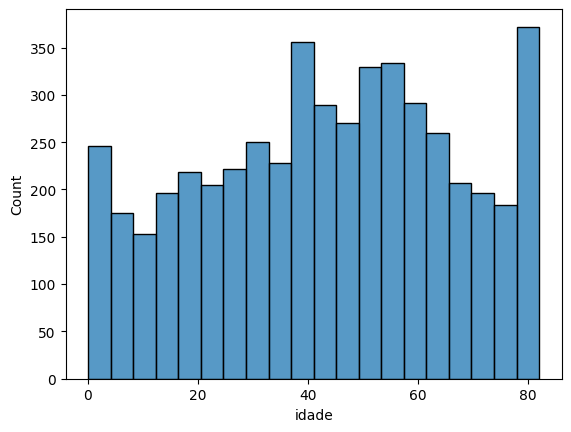

In [ ]:
#histograma para uma variável
sns.histplot(dados['idade'])

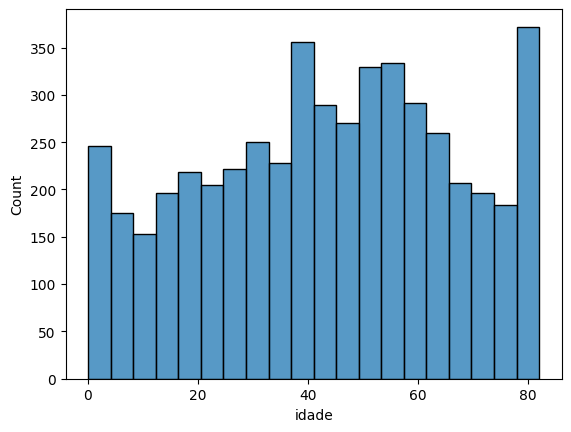

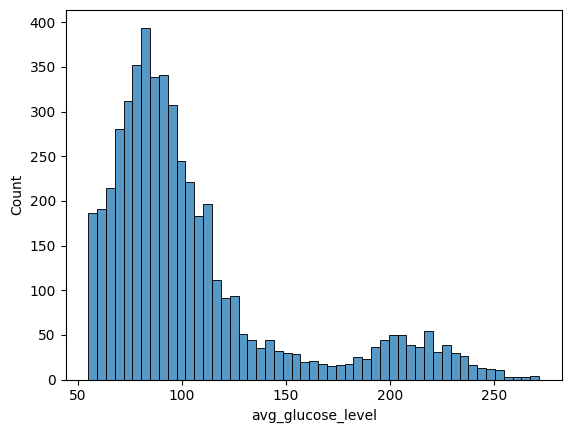

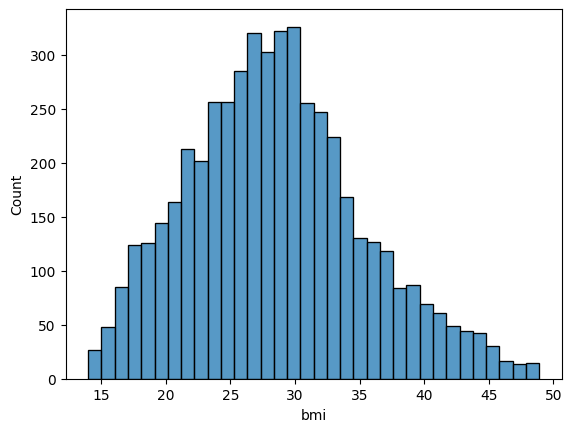

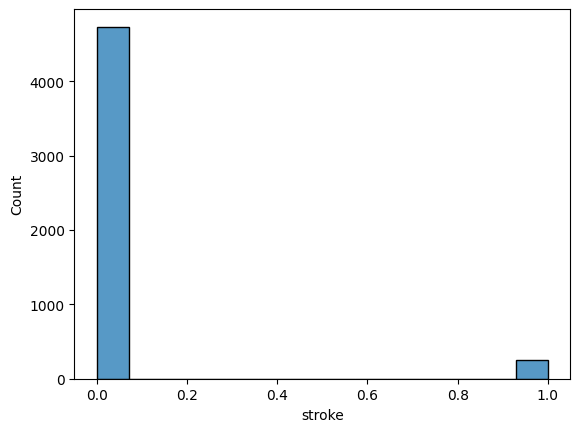

In [ ]:
#Histograma para múltiplas variáveis
for i in dados.select_dtypes(include="number").columns:
  sns.histplot(data=dados, x=i)
  plt.show()

Box plot

<Axes: ylabel='idade'>

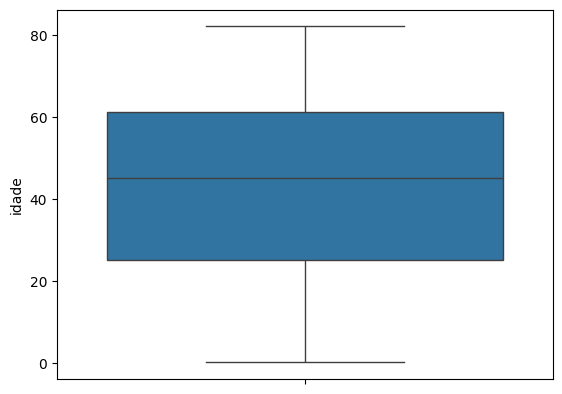

In [ ]:
#boxplot para uma variável
sns.boxplot(dados['idade'])

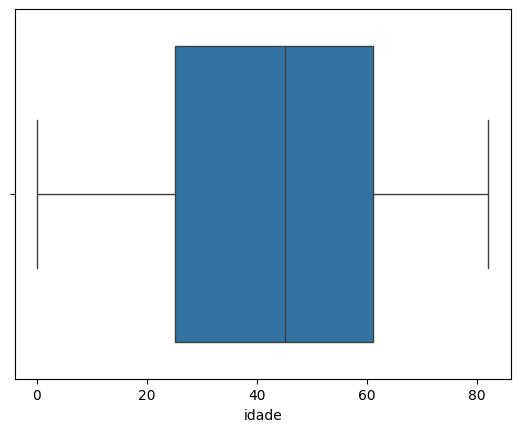

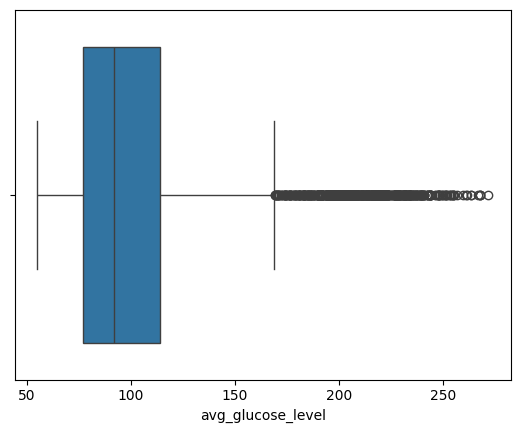

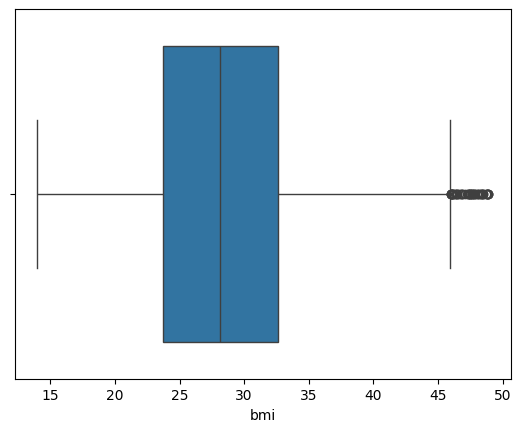

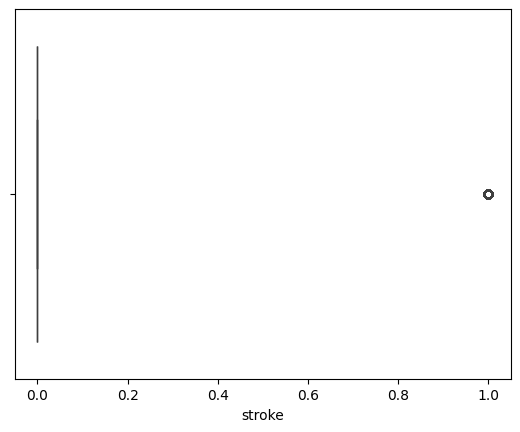

In [ ]:
#boxplot para múltiplas variáveis
for i in dados.select_dtypes(include="number").columns:
  sns.boxplot(data=dados, x=i)
  plt.show()

Dispersão

<Axes: xlabel='idade', ylabel='stroke'>

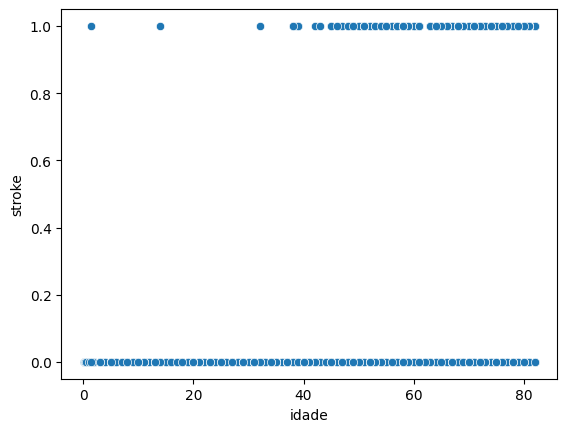

In [ ]:
#dispersão para uma variável
sns.scatterplot(x=dados['idade'], y=dados['stroke'])

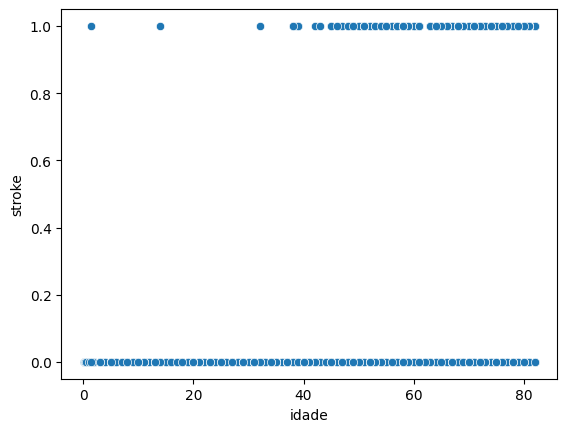

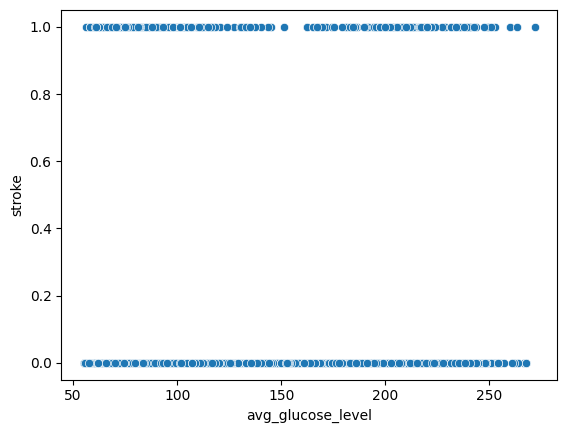

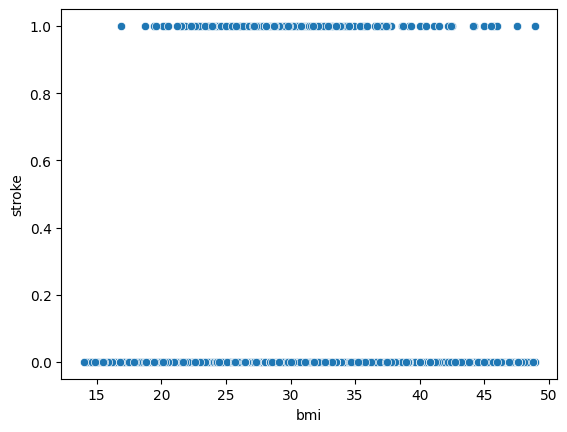

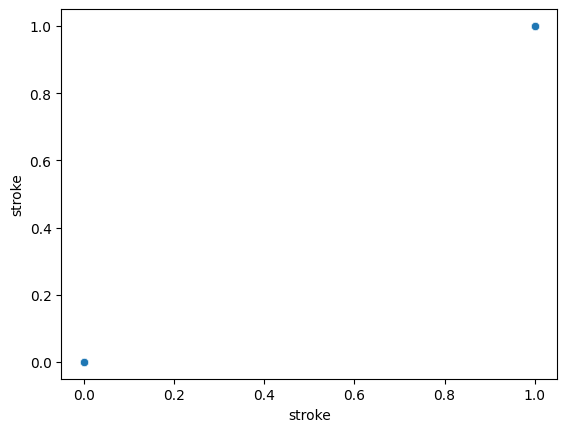

In [ ]:
#dispersão para múltiplas variáveis
for i in dados.select_dtypes(include="number").columns:
  sns.scatterplot(data=dados, x=i, y= "stroke")
  plt.show()

Correlação

<Axes: >

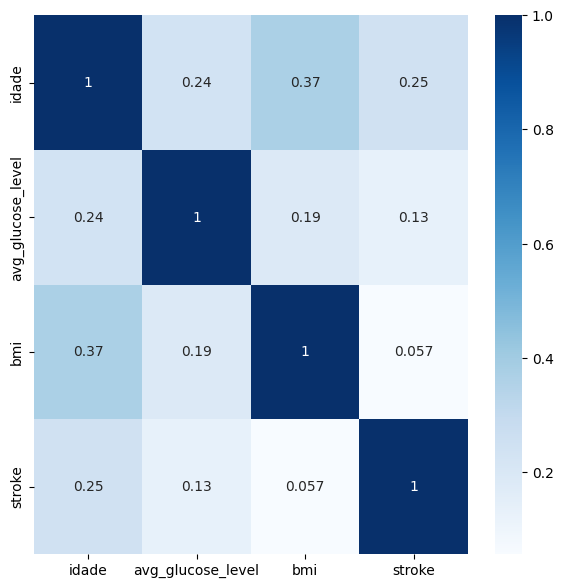

In [ ]:
correlacao = dados.select_dtypes(include="number").corr()
plt.figure(figsize=(7,7))
sns.heatmap(correlacao, annot=True, cmap="Blues")

Dummização das variáveis

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sexo               4981 non-null   object  
 1   idade              4981 non-null   float64 
 2   hypertension       4981 non-null   category
 3   heart_disease      4981 non-null   category
 4   ever_married       4981 non-null   object  
 5   work_type          4981 non-null   object  
 6   Residence_type     4981 non-null   object  
 7   avg_glucose_level  4981 non-null   float64 
 8   bmi                4981 non-null   float64 
 9   smoking_status     4981 non-null   object  
 10  stroke             4981 non-null   float64 
dtypes: category(2), float64(4), object(5)
memory usage: 360.3+ KB


In [ ]:
#identificando as variáveis categóricas
dados.select_dtypes(include=["object", "category"]).columns

Index(['sexo', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status'],
      dtype='object')

In [ ]:
#aplicando o one hot encoding
colunas = ['sexo', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
dados_final = pd.get_dummies(data=dados, columns=colunas, prefix="prefixo", drop_first= True)
dados_final

,idade,avg_glucose_level,bmi,stroke,prefixo_Masculino,prefixo_sem_hipertensao,prefixo_nao_cardiaco,prefixo_solteiro,prefixo_Filhos,prefixo_Privado,prefixo_Pública,prefixo_Urban,prefixo_fumante_ativo,prefixo_fumo_desconhecido,prefixo_nunca_fumou
0,67.0,228.69,36.6,1.0,True,True,False,False,False,True,False,True,False,False,False
1,80.0,105.92,32.5,1.0,True,True,False,False,False,True,False,False,False,False,True
2,49.0,171.23,34.4,1.0,False,True,True,False,False,True,False,True,True,False,False
3,79.0,174.12,24.0,1.0,False,False,True,False,False,False,False,False,False,False,True
4,81.0,186.21,29.0,1.0,True,True,True,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,70.15,29.8,0.0,True,True,True,True,False,True,False,False,False,False,False
4977,40.0,191.15,31.1,0.0,True,True,True,False,False,True,False,True,True,False,False
4978,45.0,95.02,31.8,0.0,False,False,True,False,False,False,True,False,True,False,False
4979,40.0,83.94,30.0,0.0,True,True,True,False,False,True,False,False,True,False,False


Ordinal Encoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# mostra quais são as categorias da variável
#dados_final['smoking_status'].unique()

In [ ]:
# após copiar as categorias salvar em um objeto
#categorias =  ['formerly smoked', 'never smoked', 'smokes', 'Unknown']

In [ ]:
#enc = OrdinalEncoder(categories=[categorias])

In [ ]:
#dados_final['smoking_status'] = enc.fit_transform(dados_final[['smoking_status']])
#dados_final['smoking_status']

Separação dos dados em Treino e Teste

Padronização ou Normalização dos dados

In [ ]:
#separação em X e y
X = dados_final.drop(columns=['stroke'], axis=1).copy()
y = dados_final['stroke'].copy()

In [ ]:
# Dividir os dados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train.value_counts()

,count
stroke,
0.0,3790
1.0,194


Padronização

In [ ]:
from sklearn.preprocessing import StandardScaler
padronizador = StandardScaler()

In [ ]:
# Suponha que você já tenha os DataFrames X_train e X_test

# Separar variáveis numéricas e categóricas
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(exclude=['int64', 'float64']).columns

In [ ]:
# Inicializar o scaler
scaler = StandardScaler()

# Fit apenas no treino e transformar treino e teste
X_train_num_padronizado = pd.DataFrame(
    scaler.fit_transform(X_train[num_cols]),
    columns=num_cols,
    index=X_train.index
)

In [ ]:
X_test_num_padronizado = pd.DataFrame(
    scaler.transform(X_test[num_cols]),
    columns=num_cols,
    index=X_test.index
)

In [ ]:
# Manter as variáveis categóricas originais
X_train_cat = X_train[cat_cols].copy()
X_test_cat = X_test[cat_cols].copy()

# Concatenar os dados novamente
X_train_padronizado = pd.concat([X_train_num_padronizado, X_train_cat], axis=1)
X_test_padronizado = pd.concat([X_test_num_padronizado, X_test_cat], axis=1)


AQUI SERIA O MOMENTO DE APLICAR A TÉCNICA "SMOTE" (APÓS A SEPARAÇÃO DOS DADOS EM TREINO E TESTE)

In [ ]:
X_train_padronizado.head()

,idade,avg_glucose_level,bmi,prefixo_Masculino,prefixo_sem_hipertensao,prefixo_nao_cardiaco,prefixo_solteiro,prefixo_Filhos,prefixo_Privado,prefixo_Pública,prefixo_Urban,prefixo_fumante_ativo,prefixo_fumo_desconhecido,prefixo_nunca_fumou
1652,-0.762027,1.380337,-0.827346,False,True,True,True,False,True,False,True,False,False,True
1609,-0.718095,-0.561999,1.650728,False,True,True,False,False,True,False,True,True,False,False
166,0.468075,-0.400544,0.375033,True,True,True,False,False,False,True,False,True,False,False
2488,-1.816400,-0.301853,-2.015062,False,True,True,True,True,False,False,False,False,True,False
3337,1.127058,0.150353,0.726949,False,False,True,False,False,True,False,False,False,False,False


CRIAÇÃO DO MODELO

In [ ]:
# Criar o modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

logistic_model = LogisticRegression(max_iter=1000)

# Definir os parâmetros a serem testados

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'saga', 'liblinear']
}

strat = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Criar o objeto GridSearchCV

model = GridSearchCV(logistic_model, param_grid, cv=strat, scoring='roc_auc', verbose=1, n_jobs=-1)

# Treinar o modelo com a busca de hiperparâmetros
model.fit(X_train_padronizado, y_train)

#print("Melhores hiperparâmetros:", model.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'saga', 'liblinear']},
             scoring='roc_auc', verbose=1)

In [ ]:
model.score(X_train_padronizado, y_train)

np.float64(0.8439327584799935)

In [ ]:
print("\033[92m Melhores hiperparâmetros:\n\n", "\033[97m", model.best_params_)

 Melhores hiperparâmetros:

  {'penalty': 'l1', 'solver': 'saga'}


In [ ]:
# Get the coefficients from the best estimator
coefficients = model.best_estimator_.coef_
coefficients

array([[ 1.60832613,  0.19211213,  0.        ,  0.06771184, -0.3638694 ,
        -0.01589575,  0.09126393,  0.        ,  0.28544187,  0.1581041 ,
         0.11971917,  0.        ,  0.01175317, -0.23580232]])

In [ ]:
# Get the feature names
feature_names = X.columns
feature_names

Index(['idade', 'avg_glucose_level', 'bmi', 'prefixo_Masculino',
       'prefixo_sem_hipertensao', 'prefixo_nao_cardiaco', 'prefixo_solteiro',
       'prefixo_Filhos', 'prefixo_Privado', 'prefixo_Pública', 'prefixo_Urban',
       'prefixo_fumante_ativo', 'prefixo_fumo_desconhecido',
       'prefixo_nunca_fumou'],
      dtype='object')

In [ ]:
# Construção de função para a definição da matriz de confusão
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score

def matriz_confusao(predicts, observado, cutoff):
    values = predicts.values
    predicao_binaria = []
    for item in values:
        if item < cutoff:
            predicao_binaria.append(0)
        else:
            predicao_binaria.append(1)
    cm = confusion_matrix(predicao_binaria, observado)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.xlabel('True')
    plt.ylabel('Classified')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.show()
    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidade = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)
    # Visualização dos principais indicadores desta matriz de confusão
    indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidade],
                                'Acurácia':[acuracia]})
    return indicadores

In [ ]:
# identificando quais variáveis foram escolhidas pelo modelo
feature_names = X.columns
feature_names

Index(['idade', 'avg_glucose_level', 'bmi', 'prefixo_Masculino',
       'prefixo_sem_hipertensao', 'prefixo_nao_cardiaco', 'prefixo_solteiro',
       'prefixo_Filhos', 'prefixo_Privado', 'prefixo_Pública', 'prefixo_Urban',
       'prefixo_fumante_ativo', 'prefixo_fumo_desconhecido',
       'prefixo_nunca_fumou'],
      dtype='object')

In [ ]:
# inserir as variaveis selecionadas dentro do modelo de classificação
novos_dados = pd.DataFrame({
    'idade' : [40],
    'avg_glucose_level' : [10],
    'bmi' : [10],
    'prefixo_Masculino' : [1],
    'prefixo_sem_hipertensao' : [1],
    'prefixo_nao_cardiaco' : [1],
    'prefixo_solteiro' :[1],
    'prefixo_Filhos' :[1],
    'prefixo_Privado' :[1],
    'prefixo_Pública' :[1],
    'prefixo_Urban' :[1],
    'prefixo_fumante_ativo' :[1],
    'prefixo_fumo_desconhecido' :[1],
    'prefixo_nunca_fumou' : [1]
    })

model.predict(novos_dados)

array([1.])

In [ ]:
# Fazer previsões
y_pred_proba = model.predict_proba(X_test_padronizado)[:, 1]
y_pred = model.predict(X_test_padronizado)       #pegando apenas a segunda coluna (probabilidade de evento(sucesso))
y_sm_pred = model.predict_proba(X_train_padronizado)[:,1]

In [ ]:
y_pred_proba[0:15,]

array([0.16232503, 0.00149217, 0.00082085, 0.01744875, 0.03458992,
       0.12106306, 0.00548174, 0.07058937, 0.00649074, 0.00727866,
       0.01558296, 0.02761111, 0.002494  , 0.0042598 , 0.13680959])

In [ ]:
# dataframe de previsao para a matriz de confusão
confusao_df = pd.DataFrame({'observado': y_test, 'predito': y_pred_proba})
confusao_df.head()

,observado,predito
1129,0.0,0.162325
3671,0.0,0.001492
1041,0.0,0.000821
2072,0.0,0.017449
1375,0.0,0.034590


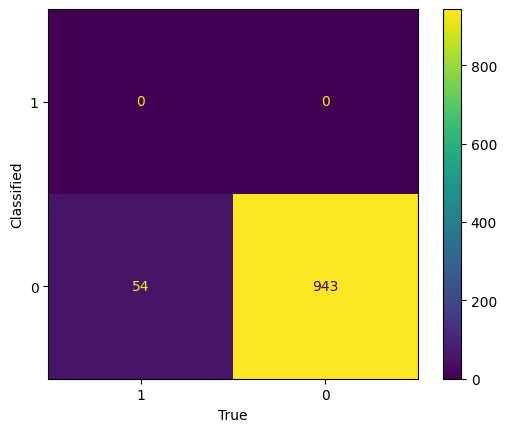

,Sensitividade,Especificidade,Acurácia
0,0.0,1.0,0.945838


In [ ]:
# Matrizes de confusão propriamente ditas

# Matriz de confusão para cutoff = 0.5
matriz_confusao(observado= confusao_df['observado'],
                predicts= confusao_df['predito'],
                cutoff=0.5)

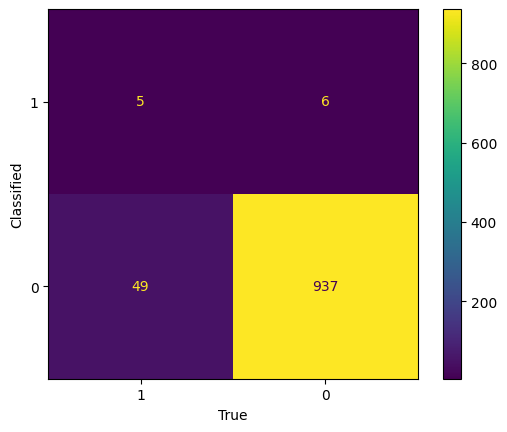

,Sensitividade,Especificidade,Acurácia
0,0.092593,0.993637,0.944835


In [ ]:
# Matrizes de confusão propriamente ditas

# Matriz de confusão para cutoff = 0.5
matriz_confusao(observado= confusao_df['observado'],
                predicts= confusao_df['predito'],
                cutoff=0.3)

In [ ]:
# 5. Avaliar o modelo
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, confusion_matrix,\
 classification_report, roc_auc_score, roc_curve

y_pred
print("Acurácia:", round(accuracy_score(y_test, y_pred),0))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("precisão:\n", round(precision_score(y_test, y_pred),2))

Acurácia: 1.0

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       943
         1.0       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997

precisão:
 0.0


Matriz de Confusão:


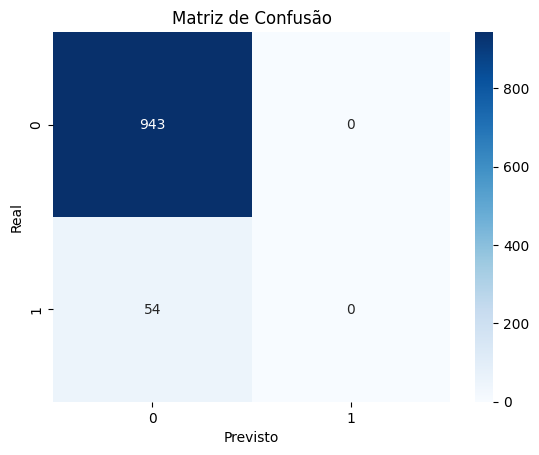

In [ ]:
print("Matriz de Confusão:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

AUC: 0.849141824751581


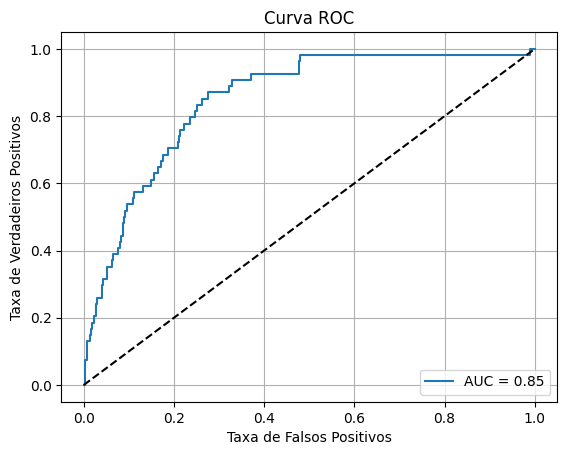

In [ ]:
# 6. Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc_score)

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid()
plt.show()